In [0]:
#@title Authenticate user and mount drive
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
%%bigquery --project bikeable bike_injury_no_mv

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE OFFENSE_CODE = 3004

In [0]:
#@title Install Latest Version of Plotly, for use in interactive graphics
!pip install plotly -q --upgrade
!pip install folium

In [0]:
#@title Import Python Libraries & Some Other Setup
# Basic Python data science libraries
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

INJURY BICYCLE NO MOTOR VEHICLES INVOLVED


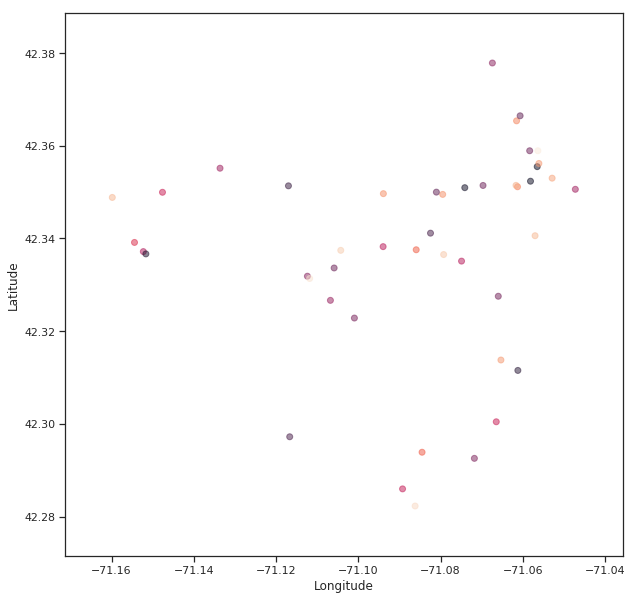

FileNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

In [321]:
#@title Display bike accidents (no motor vehicles)
bike_injury_no_mv = bike_injury_no_mv.dropna()
print("INJURY BICYCLE NO MOTOR VEHICLES INVOLVED")


bi_loc = bike_injury_no_mv[['Lat','Long']]
bi_loc = bi_loc.loc[(bi_loc['Lat']>40) & (bi_loc['Long'] < -60)]
x = bi_loc['Long']
y = bi_loc['Lat']
colors = np.random.rand(len(x))

plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig('../drive/bike_injury_no_mv.png')

In [0]:
%%bigquery --project bikeable mv_accident_bike_no_injury

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE (OFFENSE_CODE = 3811)

M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY


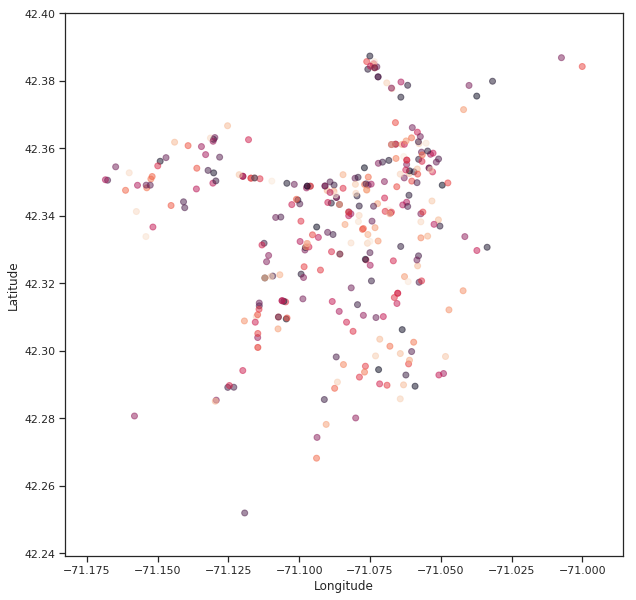

<Figure size 432x288 with 0 Axes>

In [315]:
#@title Display bike and motor vehicle accidents with NO injuries
mv_accident_bike_no_injury = mv_accident_bike_no_injury.dropna()
print("M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY")


bmvni_loc = mv_accident_bike_no_injury[['Lat','Long']]
bmvni_loc = bmvni_loc.loc[(bmvni_loc['Lat']>40) & (bmvni_loc['Long'] < -60)]
x = bmvni_loc['Long']
y = bmvni_loc['Lat']
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig('mv_accident_bike_no_injury.png')

In [0]:
%%bigquery --project bikeable mv_accident_bike_yes_injury

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE (OFFENSE_CODE = 3810)

BIKE AND MOTOR VEHICLE ACCIDENTS WITH INJURIES


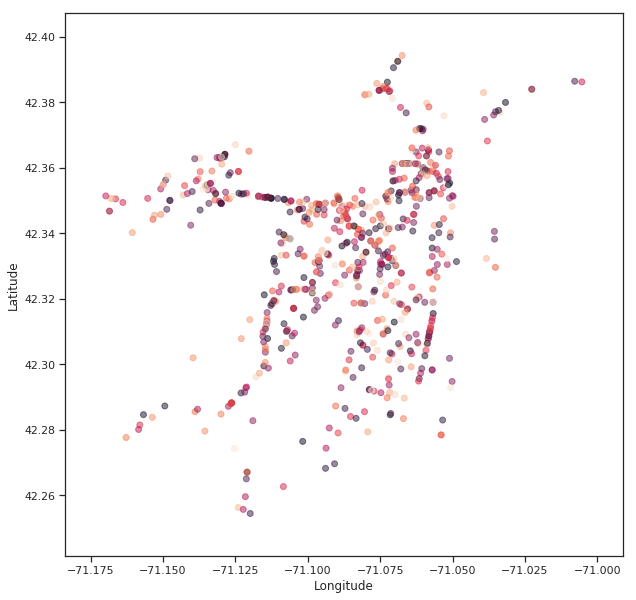

<Figure size 432x288 with 0 Axes>

In [316]:
#@title Display bike and motor vehicle accidents with injuries
mv_accident_bike_yes_injury = mv_accident_bike_yes_injury.dropna()
print("BIKE AND MOTOR VEHICLE ACCIDENTS WITH INJURIES")


bmvi_loc = mv_accident_bike_yes_injury[['Lat','Long']]
bmvi_loc = bmvi_loc.loc[(bmvi_loc['Lat']>40) & (bmvi_loc['Long'] < -60)]
x = bmvi_loc['Long']
y = bmvi_loc['Lat']
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig('mv_accident_bike_yes_injury.png')

In [0]:
%%bigquery --project bikeable larceny_theft

SELECT OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, Lat, Long FROM `bikeable.crime.boston_crime` WHERE (OFFENSE_CODE = 616) OR (OFFENSE_CODE = 626) OR (OFFENSE_CODE = 636)

LARCENY THEFT OF BICYCLE


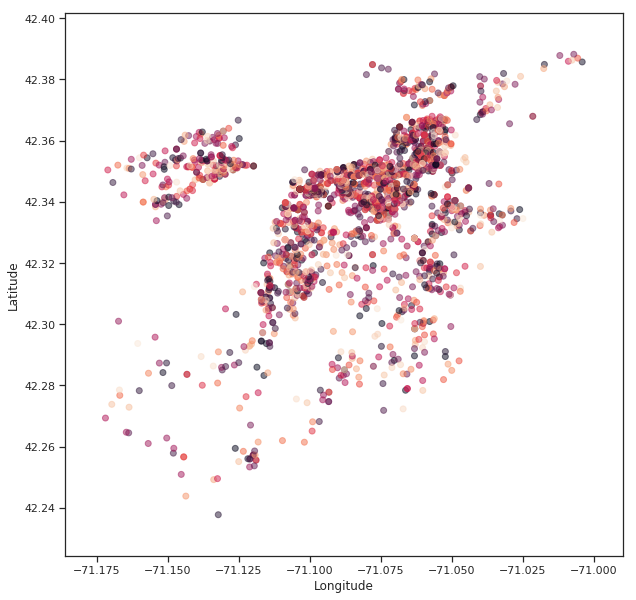

<Figure size 432x288 with 0 Axes>

In [317]:
#@title Display bicycle thefts
print("LARCENY THEFT OF BICYCLE")
larceny_theft = larceny_theft.dropna()
bt_loc = larceny_theft[['Lat','Long']]
bt_loc = bt_loc.loc[(bt_loc['Lat']>40) & (bt_loc['Long'] < -60)]
x = bt_loc['Long']
y = bt_loc['Lat']
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig('larceny_theft.png')

In [0]:
# Some useful packages
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf
import keras

In [0]:
from sklearn.neighbors import NearestNeighbors


In [0]:
columns = ['Lat', 'Long']

In [0]:
data = mv_accident_bike_yes_injury[columns]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 244 to 948
Data columns (total 2 columns):
Lat     689 non-null float64
Long    689 non-null float64
dtypes: float64(2)
memory usage: 16.1 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 244 to 948
Data columns (total 2 columns):
Lat     689 non-null float64
Long    689 non-null float64
dtypes: float64(2)
memory usage: 16.1 KB


In [0]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(mv_accident_bike_yes_injury[columns])

In [0]:
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [0]:
from sklearn.cluster import KMeans


In [0]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=5)
Kmean.fit(mv_accident_bike_yes_injury[columns])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
Kmean.cluster_centers_


array([[ 42.31258606, -71.07148732],
       [ -1.        ,  -1.        ],
       [ 42.35121825, -71.12402473],
       [ 42.35598684, -71.06654919],
       [ 42.3094592 , -71.11076281]])

In [0]:
centroids_accidents = Kmean.cluster_centers_

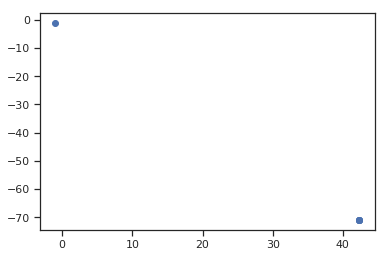

In [0]:
plt.scatter(centroids_accidents[:,0], centroids_accidents[:,1])


Centroids of Bicycle Accidents with Injuries


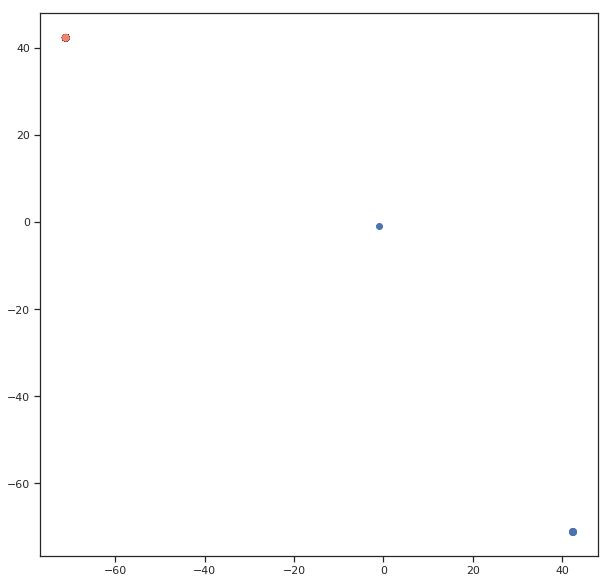

In [0]:
#@title Display Centroids of Bicycle Accidents with Injuries
print("Centroids of Bicycle Accidents with Injuries")
mv_accident_bike_yes_injury = mv_accident_bike_yes_injury.dropna()
bt_loc = mv_accident_bike_yes_injury[['Lat','Long']]
bt_loc = bt_loc.loc[(bt_loc['Lat']>40) & (bt_loc['Long'] < -60)]
x = bt_loc['Long']
y = bt_loc['Lat']
colors = np.random.rand(3)
colors = np.random.rand(len(x))
plt.figure(figsize=(10,10))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.scatter(centroids_accidents[:,0], centroids_accidents[:,1])

plt.show()

In [0]:
# LEAST dangerous

#bike_injury_no_mv -  bike accidents (no motor vehicles) = 1
# mv_accident_bike_yes_injury - bike and motor vehicle accidents with NO injuries = 2
# mv_accident_bike_no_injury - Display bike and motor vehicle accidents with no injuries = 3

# MOST dangerous



In [0]:
bike_injury_no_mv['rating'] = 10
mv_accident_bike_yes_injury['rating'] = 100
mv_accident_bike_no_injury['rating'] = 1000

In [0]:
frames = [bike_injury_no_mv, mv_accident_bike_yes_injury, mv_accident_bike_no_injury]

fullData = pd.concat(frames)

In [0]:
columns = ['Lat', 'Long', 'rating']
fullData = fullData[columns]


In [0]:
#drop -1 and -1
fullData = fullData.drop(fullData[(fullData.Long == -1) & (fullData.Lat == -1)].index)

In [0]:
fullData.sample(5)

,Lat,Long,rating
362,42.357340,-71.054913,2
522,42.310215,-71.057830,2
504,42.320153,-71.062204,2
385,42.303927,-71.114662,3
227,42.333466,-71.057016,3


In [0]:
mv_accident_bike_yes_injury.sample(5)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,rating
719,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2016-06-01 07:43:00+00:00,2016,6,Wednesday,7,DAY ST,42.323814,-71.109138,2
332,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2018-09-14 17:33:00+00:00,2018,9,Friday,17,BOWDOIN ST,42.361180,-71.062864,2
324,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2018-08-21 07:46:00+00:00,2018,8,Tuesday,7,CAMBRIDGE ST,42.361168,-71.063716,2
292,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2015-09-14 18:27:00+00:00,2015,9,Monday,18,ALFORD ST,42.394213,-71.067413,2
765,3810,Motor Vehicle Accident Response,M/V ACCIDENT - INVOLVING BICYCLE - INJURY,2016-05-02 17:15:00+00:00,2016,5,Monday,17,WESTLAND AVE,42.343765,-71.088669,2


In [0]:
# find value counts by time

In [0]:
mv_accident_bike_yes_injury['OCCURRED_ON_DATE'].value_counts()

2016-12-02 19:45:00+00:00    1
2016-06-24 14:16:00+00:00    1
2016-09-23 20:45:55+00:00    1
2016-01-09 15:11:00+00:00    1
2016-07-28 09:45:00+00:00    1
2018-05-04 13:03:00+00:00    1
2015-11-25 17:39:00+00:00    1
2015-10-05 07:45:00+00:00    1
2017-01-26 15:05:00+00:00    1
2015-09-21 11:27:00+00:00    1
2016-12-04 18:58:00+00:00    1
2017-06-26 19:30:00+00:00    1
2017-08-09 16:53:00+00:00    1
2016-06-03 22:15:00+00:00    1
2018-09-29 12:46:00+00:00    1
2017-08-16 16:04:00+00:00    1
2017-06-15 14:40:00+00:00    1
2018-09-12 08:43:00+00:00    1
2016-04-29 21:43:00+00:00    1
2018-09-23 18:22:00+00:00    1
2016-06-23 17:59:00+00:00    1
2016-12-23 15:02:00+00:00    1
2017-07-31 07:00:00+00:00    1
2018-03-01 16:10:00+00:00    1
2015-10-05 16:37:00+00:00    1
2018-07-27 03:08:00+00:00    1
2016-03-21 19:36:00+00:00    1
2015-07-15 08:56:00+00:00    1
2016-10-26 16:49:00+00:00    1
2017-10-11 17:05:00+00:00    1
                            ..
2015-07-07 08:34:00+00:00    1
2016-10-

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:915: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


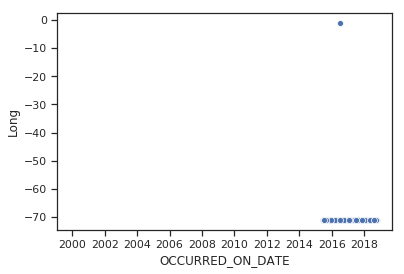

In [0]:
# military time
# time by long

import matplotlib.pyplot as plt

ax = sns.scatterplot(x="OCCURRED_ON_DATE", y="Long", data=mv_accident_bike_yes_injury)

Automatically created module for IPython interactive environment


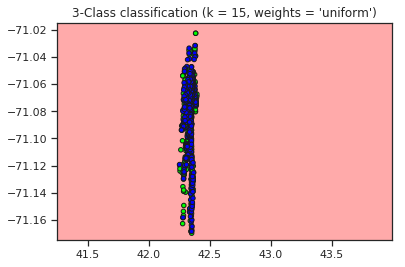

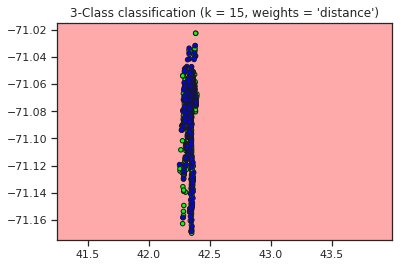

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = fullData[['Long', 'Lat']]
y = fullData['rating']

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = fullData.iloc[:, 0].min() - 1, fullData.iloc[:, 0].max() + 1
    y_min, y_max = fullData.iloc[:, 1].min() - 1, fullData.iloc[:, 1].max() + 1
    X_min = 42.2
    x_max = 44
    
    y_max = -71
    y_min = -71.175
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(fullData.iloc[:, 0], fullData.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# K- Means

In [0]:
# todo 

# Gaussian KDE

Gaussian Kernel Density Estimation of all data points


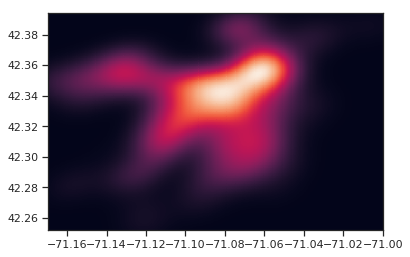

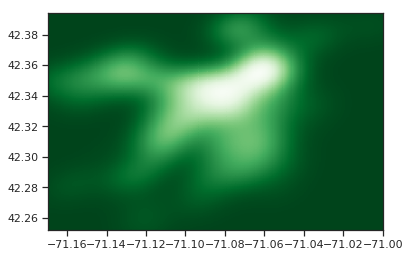

In [322]:
# Heat map
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
print("Gaussian Kernel Density Estimation of all data points")

# create data
x = fullData['Long']
y = fullData['Lat']
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.show()


# KDE Plot

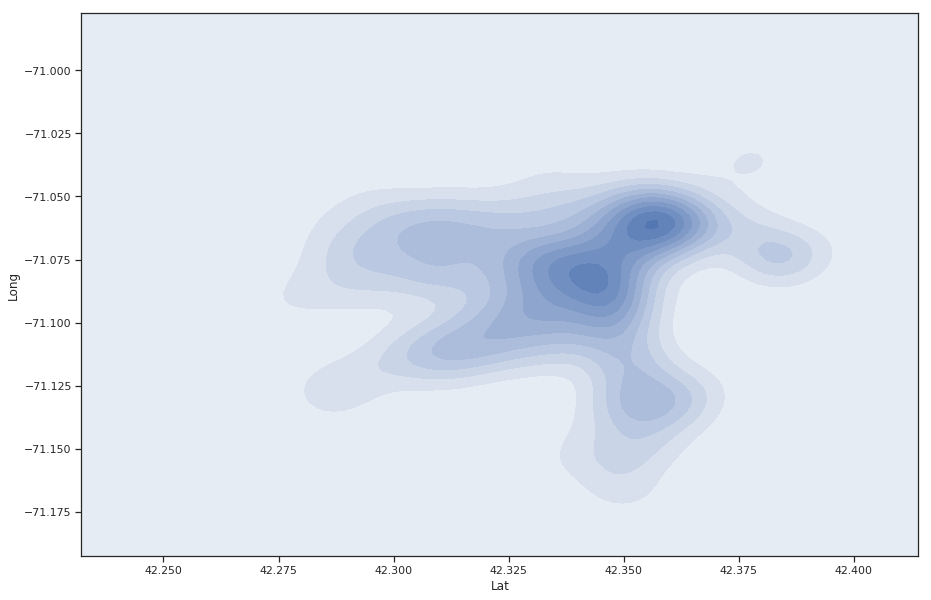

In [0]:
# Make marginal bigger:
plt.figure(figsize=(15,10))
ax = sns.kdeplot(fullData["Lat"], fullData["Long"], shade=True)

# Hexbin plot

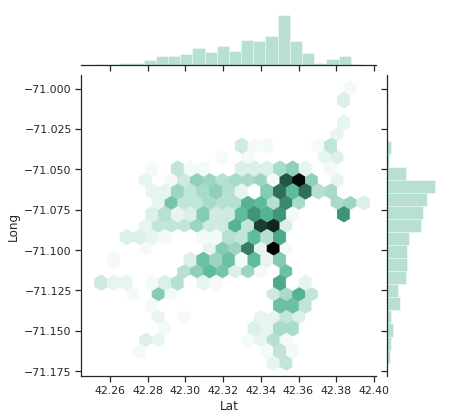

In [0]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

x = fullData["Lat"]
y = fullData["Long"]

#more hexagons 
sns.jointplot(x, y, kind="hex", color="#4CB391")

# Histogram 2D with all Data points (Matplotlib)

histogram of all data


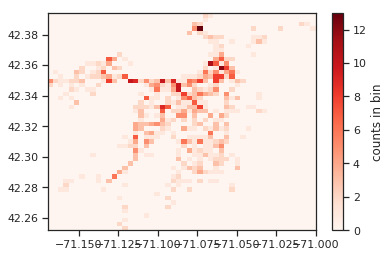

In [323]:
print("histogram of all data")
plt.hist2d(fullData["Long"], fullData["Lat"], bins=50, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [0]:
counts, xedges, yedges = np.histogram2d(fullData["Lat"], fullData["Long"], bins=40)


In [0]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

heat map


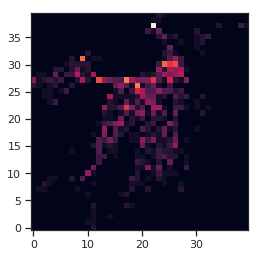

In [324]:
print("heat map")
plt.imshow(counts, interpolation='nearest', origin='low')

In [0]:
xedges.shape

(31,)

In [0]:
counts

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,

In [0]:
# Get the points
# > 8
#(data.age.counts > 80).sum() #something like this ??? 


AttributeError: ignored

In [0]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
dataKde = np.vstack([fullData["Long"], fullData["Lat"]])
kde = gaussian_kde(dataKde)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

In [0]:
Z

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:

#sns.kdeplot(mv_accident_bike_yes_injury['Lat'], 
 #           mv_accident_bike_yes_injury['Long'], 
  #          color='r', shade=True, Label='Yes injury', 
   #         cmap="Reds", shade_lowest=False) 
  
#sns.kdeplot(mv_accident_bike_no_injury['Lat'],  
 #           mv_accident_bike_no_injury['Long'], color='b', 
  #          shade=True, Label='No Injury', 
   #         cmap="Blues", shade_lowest=False) 

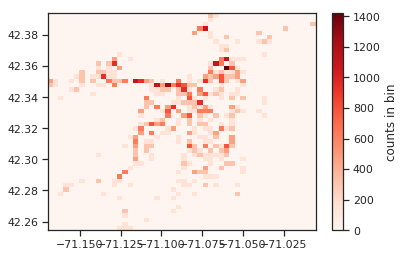

In [0]:
mv_accident_bike_yes_injury = mv_accident_bike_yes_injury.drop(mv_accident_bike_yes_injury[(mv_accident_bike_yes_injury.Long == -1) & (mv_accident_bike_yes_injury.Lat == -1)].index)
plt.hist2d(mv_accident_bike_yes_injury["Long"], mv_accident_bike_yes_injury["Lat"], bins=50, cmap='Reds', normed=True)
cb = plt.colorbar()
cb.set_label('counts in bin')

#20

In [0]:
counts, xedges, yedges = np.histogram2d(mv_accident_bike_yes_injury["Lat"], mv_accident_bike_yes_injury["Long"], bins=20)


In [0]:
counts.shape

(20, 20)

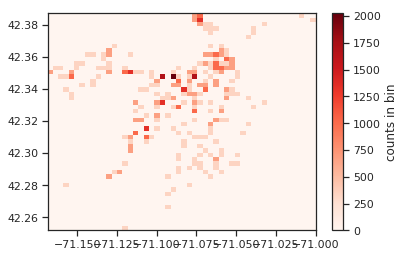

In [0]:
mv_accident_bike_no_injury = mv_accident_bike_no_injury.drop(mv_accident_bike_no_injury[(mv_accident_bike_no_injury.Long == -1) & (mv_accident_bike_no_injury.Lat == -1)].index)
plt.hist2d(mv_accident_bike_no_injury["Long"], mv_accident_bike_no_injury["Lat"], bins=50, cmap='Reds', normed=True)
cb = plt.colorbar()
cb.set_label('counts in bin')

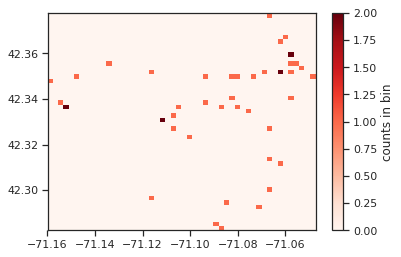

In [0]:
bike_injury_no_mv = bike_injury_no_mv.drop(bike_injury_no_mv[(bike_injury_no_mv.Long == -1) & (bike_injury_no_mv.Lat == -1)].index)

plt.hist2d(bike_injury_no_mv["Long"], bike_injury_no_mv["Lat"], bins=50, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [0]:
#plt.figure(figsize=(15,10))
#plt.xlim(44,45 )
#sns.kdeplot(mv_accident_bike_yes_injury["Lat"], mv_accident_bike_yes_injury["Long"], shade=True)

In [0]:
import os
import folium

print(folium.__version__)

0.8.3


In [0]:
fullData['Lat'].shape

(1056,)

In [0]:
fullData['Long'].shape

(1056,)

In [0]:
from folium import plugins
from folium.plugins import HeatMap


#start location
map_hooray = folium.Map(location=[42.32,-71.08],
                    zoom_start = 13)  #greater the number, greater the zoom


#map_hooray
floriumData = fullData[['Lat','Long', 'rating']]

# List comprehension to make out list of lists
#heat_data = [[fullData['Lat'],fullData['Long']] for index, row in fullData.iterrows()]



hm_wide = HeatMap( list(zip(floriumData.Lat.values, floriumData.Long.values, floriumData.rating.values)),
                   min_opacity=0.3,
                   radius=17, blur=15, 
                   max_zoom=30, 
                 )
# Plot it on the map
#HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray.add_child(hm_wide)

In [0]:
map_hooray.save('index2.html')


# Bike Thefts

In [0]:
# drop null values
larceny_theft = larceny_theft.drop(larceny_theft[(larceny_theft.Long == -1) & (larceny_theft.Lat == -1)].index)

In [0]:
larceny_theft.head(5)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
108,616,Larceny,LARCENY THEFT OF BICYCLE,2017-10-18 19:17:00+00:00,2017,10,Wednesday,19,WILLIAM J DAY BLVD,42.322678,-71.049329
109,616,Larceny,LARCENY THEFT OF BICYCLE,2016-07-26 19:34:00+00:00,2016,7,Tuesday,19,RIVER,42.333351,-71.112291
118,616,Larceny,LARCENY THEFT OF BICYCLE,2016-07-13 09:00:00+00:00,2016,7,Wednesday,9,AVENUE DE LAFAYETTE,42.353700,-71.061745
121,616,Larceny,LARCENY THEFT OF BICYCLE,2018-09-27 21:50:00+00:00,2018,9,Thursday,21,NASHUA ST,42.367616,-71.066014
122,616,Larceny,LARCENY THEFT OF BICYCLE,2016-09-02 16:00:00+00:00,2016,9,Friday,16,NASHUA ST,42.367616,-71.066014


In [0]:
bikeTheftMap = folium.Map(location=[42.32,-71.08],
                    zoom_start = 13)  #greater the number, greater the zoom


hm_wide = HeatMap( list(zip(larceny_theft.Lat.values, larceny_theft.Long.values)),
                   min_opacity=0.2,
                   radius=17, blur=15, 
                   max_zoom=18, 
                 )
# Plot it on the map
#HeatMap(heat_data).add_to(map_hooray)

# Display the map
bikeTheftMap.add_child(hm_wide)

In [0]:
bikeTheftMap.save('bikeTheft.html')

In [318]:
from google.colab import files
files.download('content/mv_accident_bike_no_injury.png')

FileNotFoundError: ignored